# Matching

### a. Install packages and read in data

In [1]:
# install.packages(c('Matching', 'rgenoud', 'ggplot2', 'cobalt', 'patchwork'))
library(patchwork)
library(Matching)
library(rgenoud)
library(ggplot2)
library(cobalt)

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:patchwork’:

    area


## 
##  Matching (Version 4.10-2, Build Date: 2022-04-13)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##


##  rgenoud (Version 5.9-0.3, Build Date: 2022-04-19)
##  See http://sekhon.berkeley.edu/rgenoud for additional documentation.
##  Please cite software as:
##   Walter Mebane, Jr. and Jasjeet S. Sekhon. 2011.
##   ``Genetic Optimization Using Derivatives: The rgenoud package for R.''
##   Journal of Statistical Software, 42(11): 1-26. 
##


 cobalt (Version 4.3.2, Build Date: 2022-01-19)



In [2]:
df = read.csv('/work/DS4SG-Gender-Inequality/data/processed/winner_takes_all_v2.csv')
head(df)

,search_query,name,gender,join_date_from_earliest,location_size,hourly_rate,pay_grade,avg_rating,num_reviews,num_recommendations,⋯,design_skills,teaching_training_skills,miscellaneous_skills,language_certifications,freelancer_certifications,general_skill_certifications,programming_certifications,top_skill_category,top_skill_category_encoded,top_skill_category_count
,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>
1,2,Milen,0,7063,1,45,0,0,0,0,⋯,8,0,1,0,0,0,0,design_skills,0,8
2,2,Jeremy,0,7526,1,90,0,0,0,0,⋯,18,0,0,1,0,0,0,design_skills,0,18
3,2,Nichole,1,6430,0,25,4,5,2,0,⋯,16,0,0,1,0,0,0,design_skills,0,16
4,2,Robert,0,3238,1,75,0,0,0,0,⋯,5,0,0,0,1,0,0,technical_programming_skills,4,9
5,2,Jean-Paul,0,6661,5,19,0,0,0,0,⋯,6,0,0,0,0,0,0,design_skills,0,6
6,2,Brianna,1,6272,1,10,0,0,0,0,⋯,3,0,0,0,0,0,0,design_skills,0,3


### b. Randomly sample 1000 data points for testing

In [3]:
# sample = df[sample(nrow(df), 1000), ]
# head(sample)

### c. Match on variables of interest &amp; calculate treatment effect

In [4]:
attach(df)

# variables to match on
X <- cbind(join_date_from_earliest, location_size, avg_rating, num_reviews, num_recommendations, pct_jobs_completed, pct_on_budget, pct_on_time, verification_preferred_freelancer, verification_identity_verified, verification_payment_verified, verification_phone_verified, verification_email_verified, verification_facebook_connected, badge_plus_membership, badge_preferred_freelancer, badge_verified, top_skill_category_encoded, top_skill_category_count)

# find optimal weights with GenMatch
genout <- GenMatch(X=X, Tr=gender, estimand="ATE", M=1, pop.size=64, max.generations=20, wait.generations=4, caliper=c(0.25, 0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.25))



Fri Apr 22 16:28:07 2022
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 
 0.000000e+00   <=  X11  <=    1.000000e+03 
 0.000000e+00   <=  X12  <=    1.000000e+03 
 0.000000e+00   <=  X13  <=    1.000000e+03 
 0.000000e+00   <=  X14  <=    1.000000e+03 
 0.000000e+00   <=  X15  <=    1.000000e+03 
 0.000000e+00   <=  X16  <=    1.000000e+03 
 0.000000e+00   <=  X17  <=    1.000000e+03 
 0.000000e+00   <=  X18  <=    1.000000e+03 
 0.000000e+00   <=  X19  <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning...........................

In [5]:
# estimate causal effect using weights - no regression
mout <- Match(X=X, Y=hourly_rate, Tr=gender, Weight.matrix=genout)
summary(mout)


Estimate...  -2.4268 
AI SE......  1.2547 
T-stat.....  -1.9341 
p.val......  0.053096 

Original number of observations..............  9766 
Original number of treated obs...............  3074 
Matched number of observations...............  3074 
Matched number of observations  (unweighted).  3269 



In [6]:
# check balance on variables of interest
mb <- MatchBalance(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified + top_skill_category_encoded + top_skill_category_count, match.out=mout, nboots=1000)
summary(mb)


***** (V1) join_date_from_earliest *****
                       Before Matching 	 	 After Matching
mean treatment........     6632.3 	 	     6632.3 
mean control..........     6212.8 	 	     6639.6 
std mean diff.........     36.976 	 	   -0.64033 

mean raw eQQ diff.....     420.52 	 	     19.058 
med  raw eQQ diff.....        402 	 	         12 
max  raw eQQ diff.....       1627 	 	        491 

mean eCDF diff........   0.086589 	 	  0.0057371 
med  eCDF diff........   0.097927 	 	   0.003059 
max  eCDF diff........    0.12597 	 	   0.027531 

var ratio (Tr/Co).....    0.59838 	 	     1.0022 
T-test p-value........ < 2.22e-16 	 	     0.1163 
KS Bootstrap p-value.. < 2.22e-16 	 	      0.163 
KS Naive p-value...... < 2.22e-16 	 	    0.16775 
KS Statistic..........    0.12597 	 	   0.027531 


***** (V2) location_size *****
                       Before Matching 	 	 After Matching
mean treatment........     1.9424 	 	     1.9424 
mean control..........     1.9105 	 	     1.9333 
std me

                    Length Class  Mode     
BeforeMatching      19     -none- list     
AfterMatching       19     -none- list     
BMsmallest.p.value   1     -none- numeric  
BMsmallestVarName    9     -none- character
BMsmallestVarNumber  9     -none- numeric  
AMsmallest.p.value   1     -none- numeric  
AMsmallestVarName    1     -none- character
AMsmallestVarNumber  1     -none- numeric  

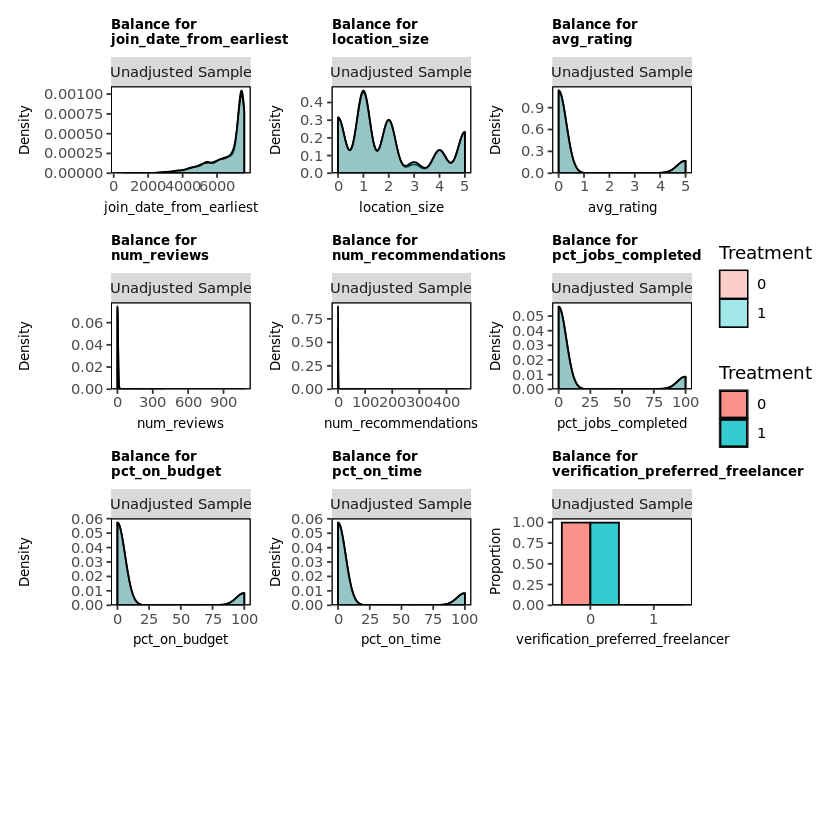

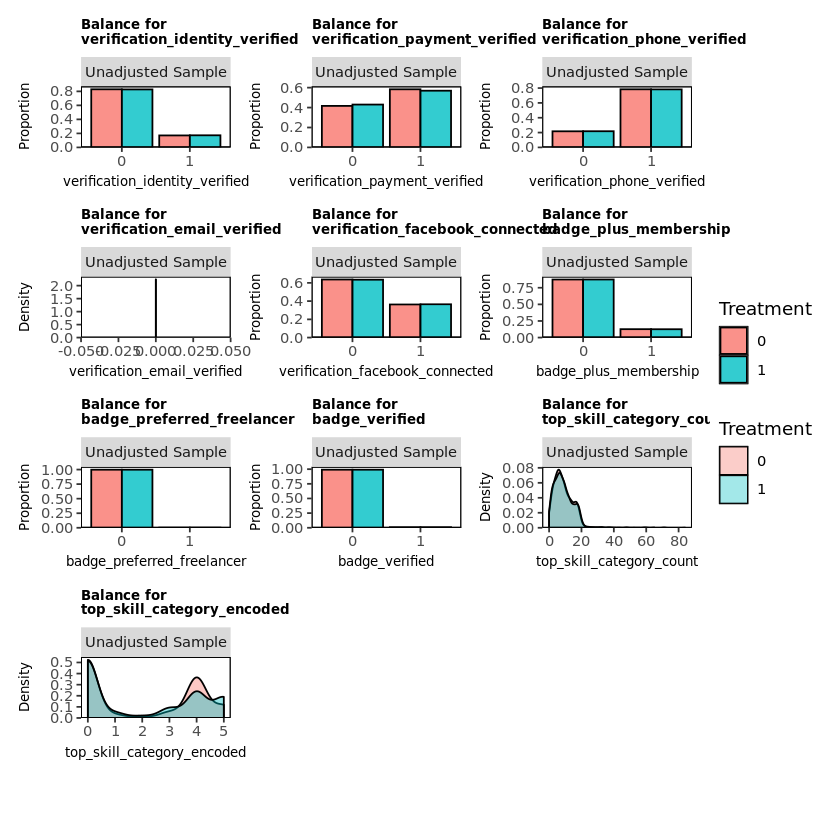

In [10]:
#Get matched dataset for accountants
matched_dataset= rbind(df[mout$index.treated,],df[mout$index.control,])

#Create distributional balance plots
covariates <- list('join_date_from_earliest', 'location_size', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_budget', 'pct_on_time', 'verification_preferred_freelancer', 'verification_identity_verified', 'verification_payment_verified', 'verification_phone_verified', 'verification_email_verified', 'verification_facebook_connected', 'badge_plus_membership', 'badge_preferred_freelancer', 'badge_verified', 'top_skill_category_count', 'top_skill_category_encoded')

for(i in 1:length(covariates)) {                    # assign function within loop
  assign(paste0("cov_", i), bal.plot(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified + top_skill_category_encoded + top_skill_category_count, data=matched_dataset, var.name= covariates[[i]])
  + labs(title= sprintf("Balance for\n%s", covariates[[i]])) 
  + theme(plot.title = element_text(size=8, face="bold"), axis.title.x = element_text(size=8), axis.title.y = element_text(size=8) ))
}

cov_1 + cov_2 + cov_3 + cov_4 + cov_5 + cov_6 + cov_7 + cov_8 + cov_9 + 
    plot_layout(guides = "collect", ncol = 3, nrow=5, widths = c(7,7,7), heights= c(5,5,5))

cov_10 + cov_11 + cov_12 + cov_13 + cov_14 + cov_15 + cov_16 + cov_17 + cov_18 + cov_19 +
    plot_layout(guides = "collect", ncol = 3, nrow=5, widths = c(7,7,7), heights= c(5,5,5))

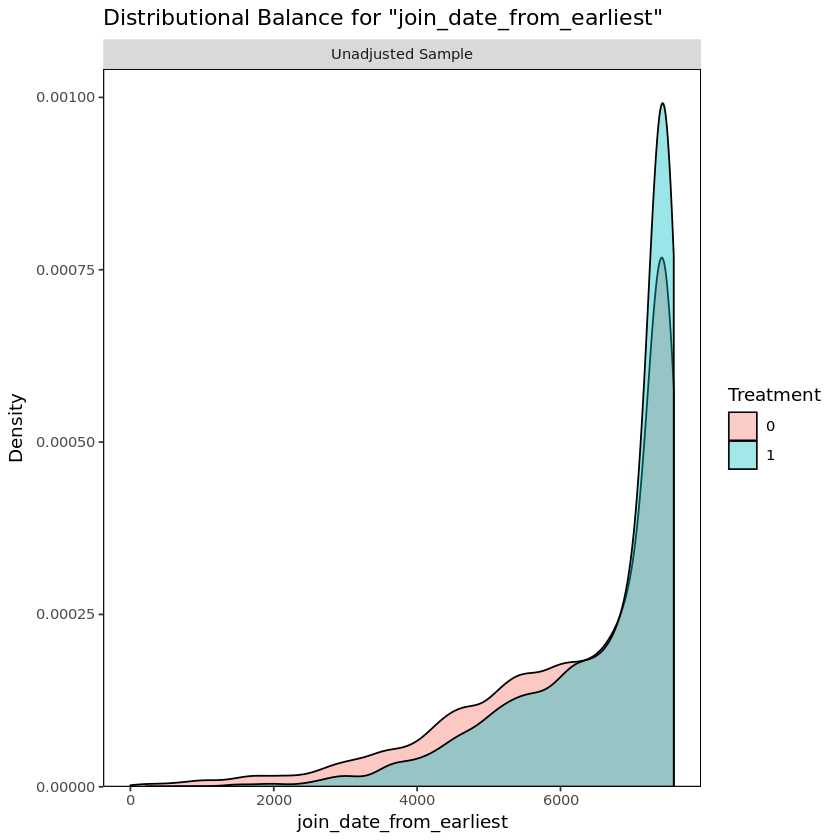

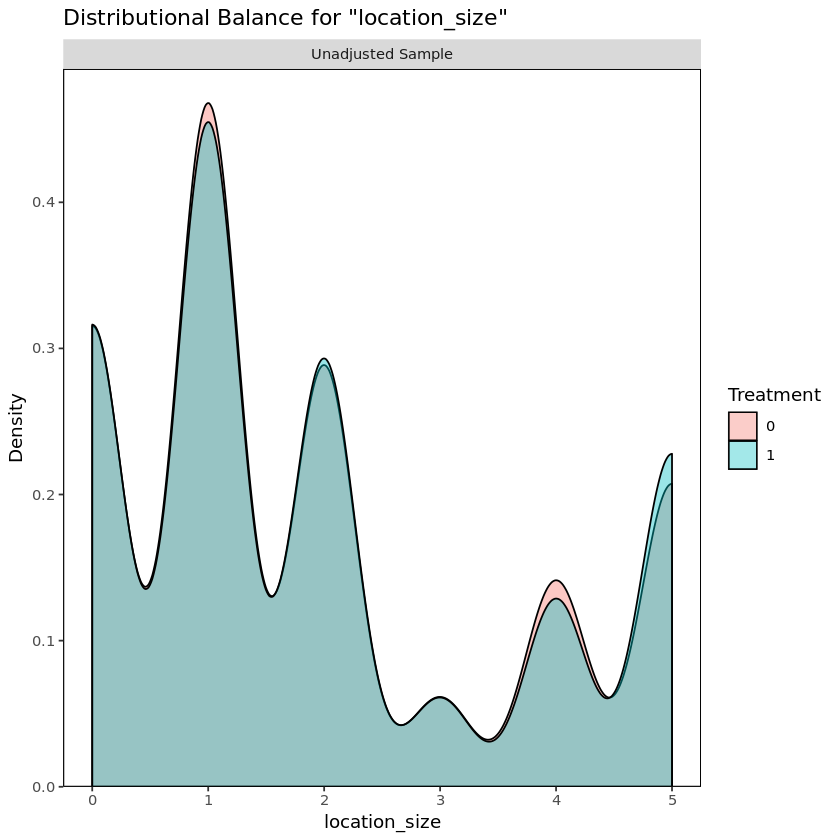

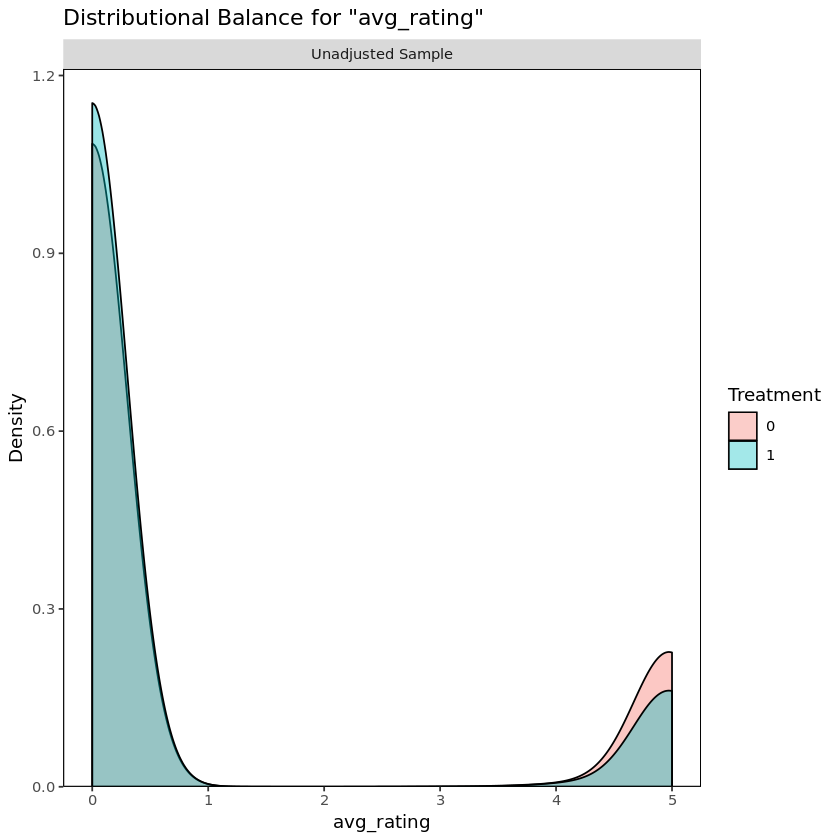

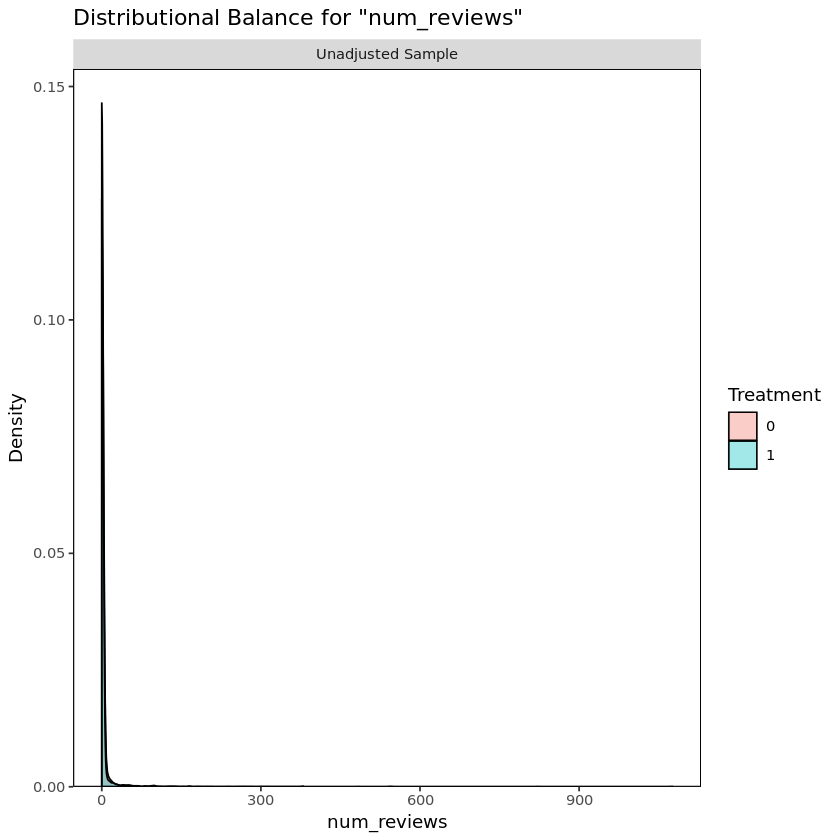

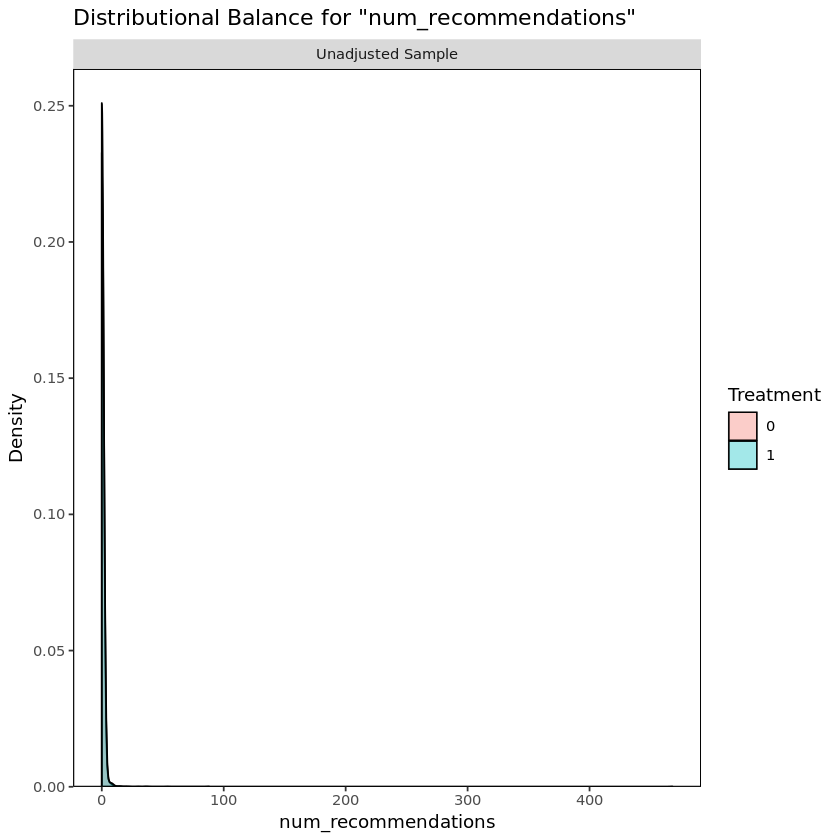

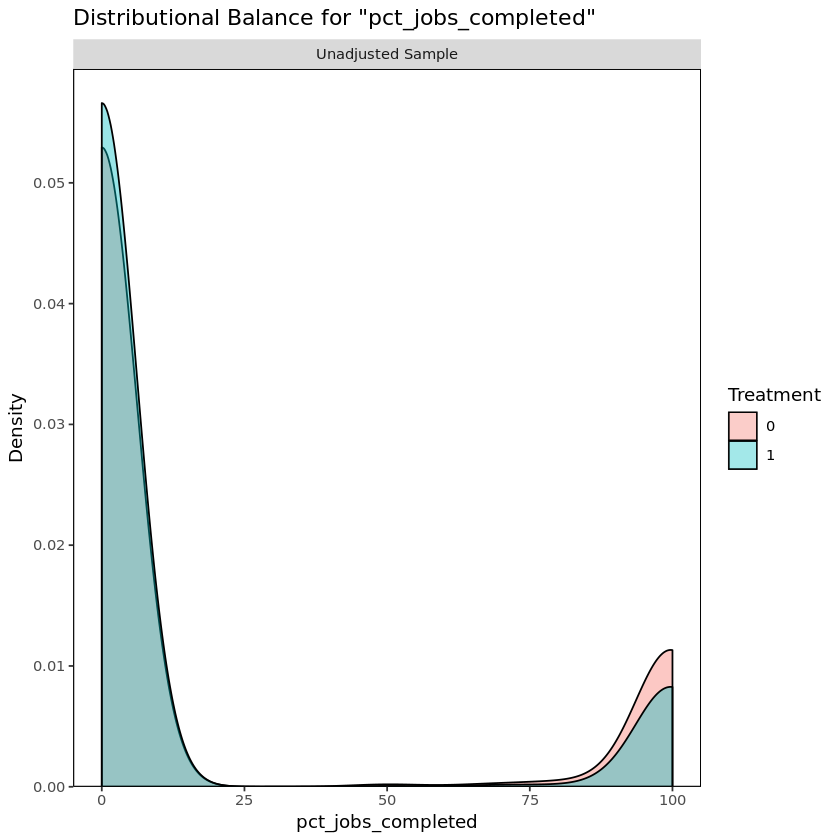

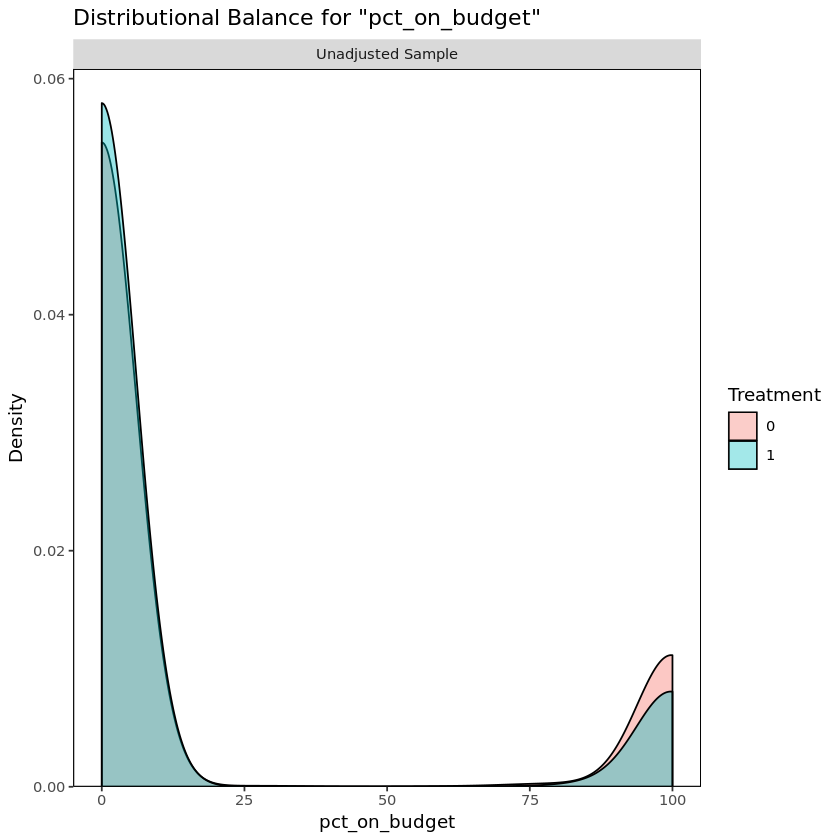

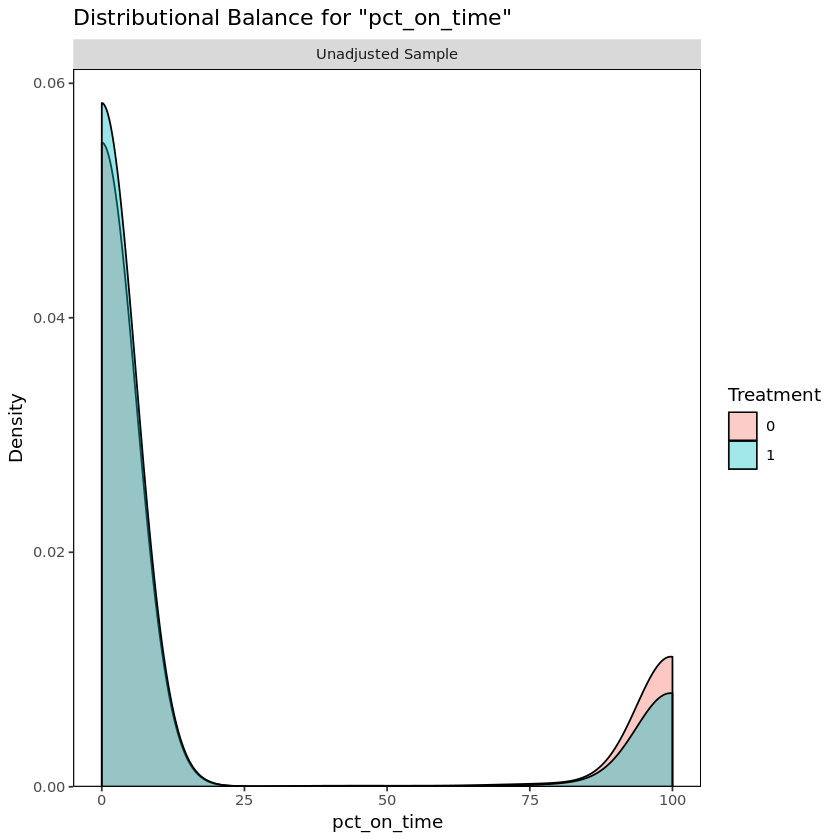

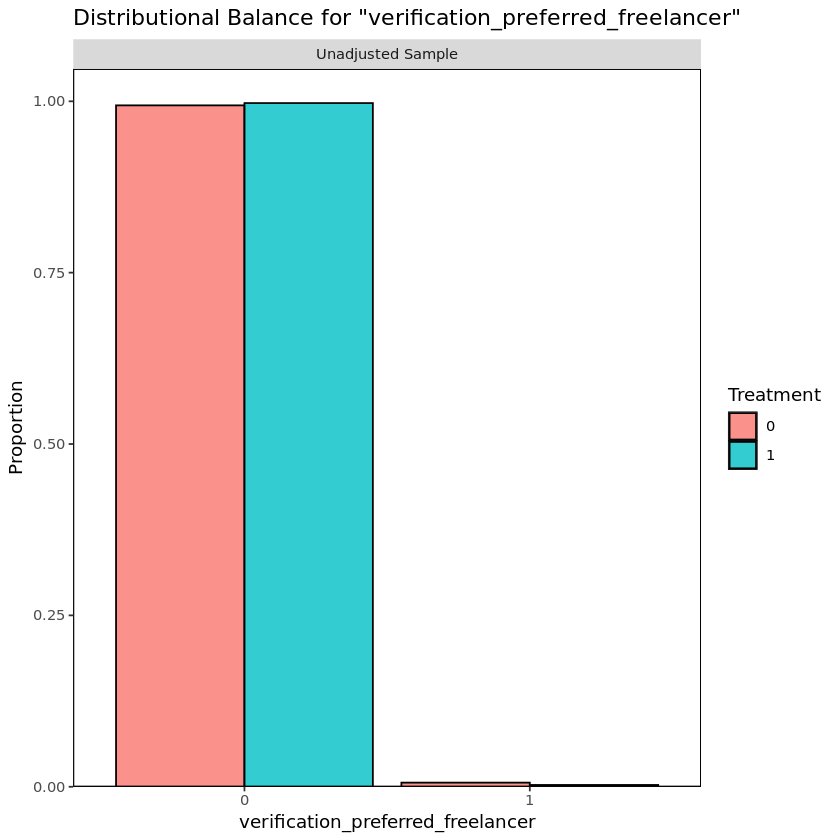

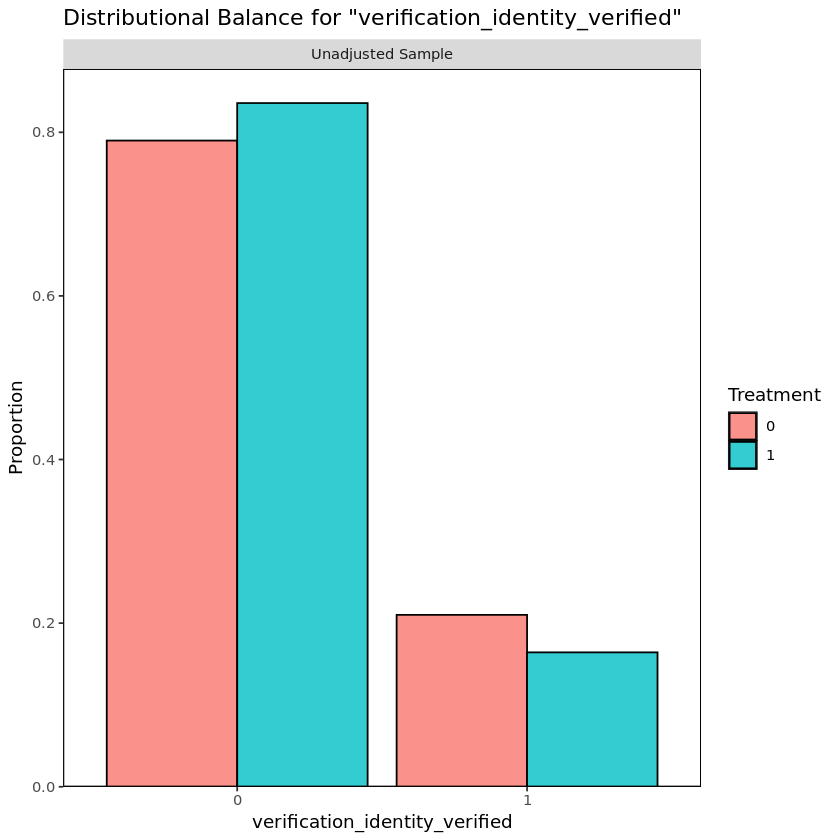

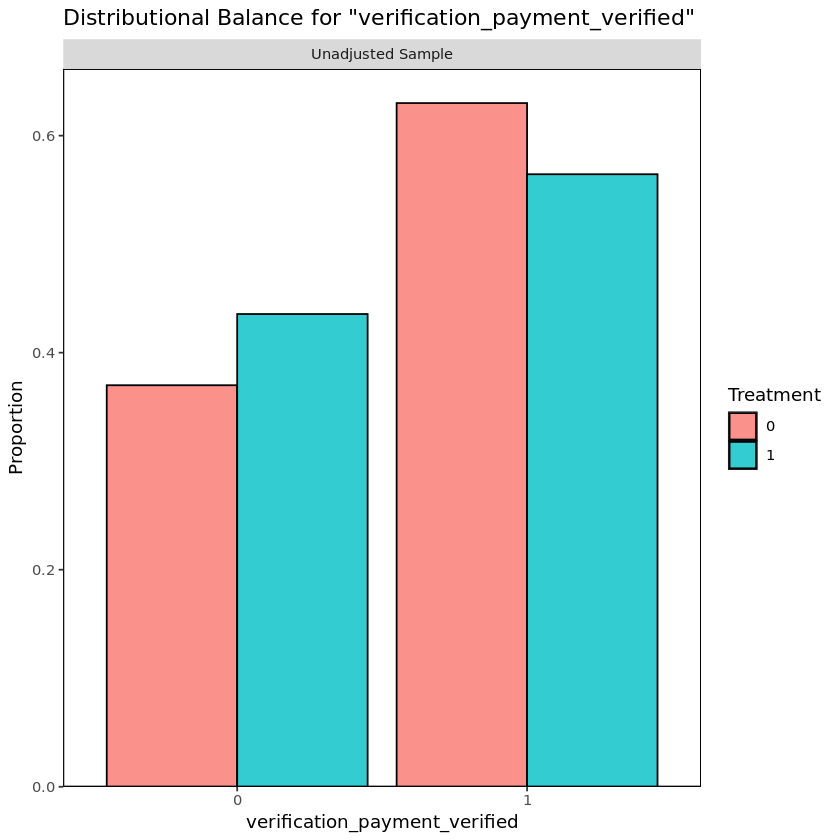

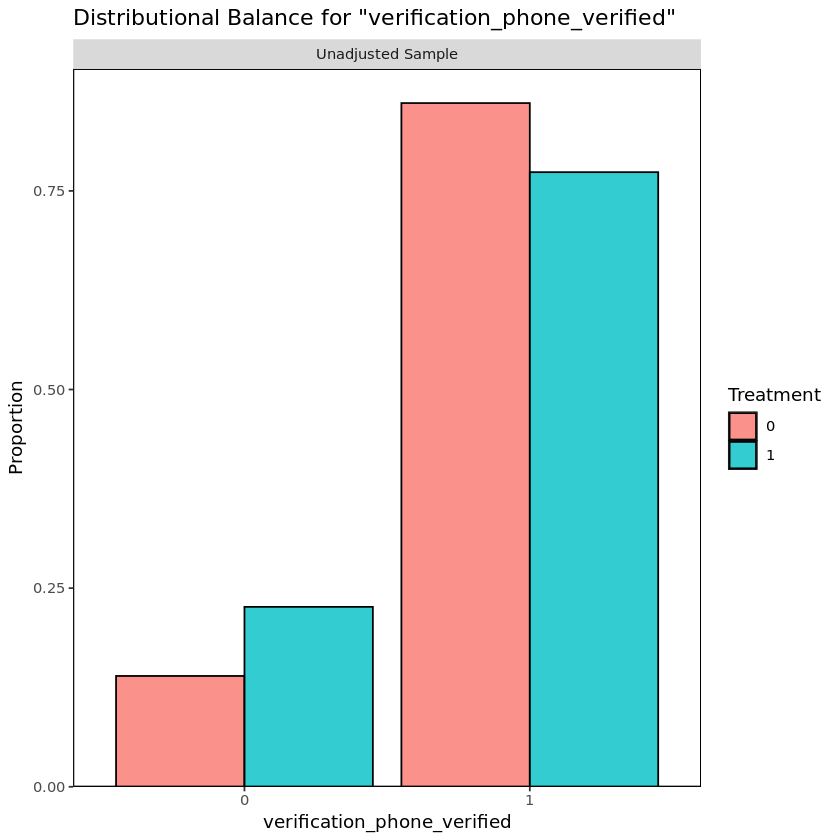

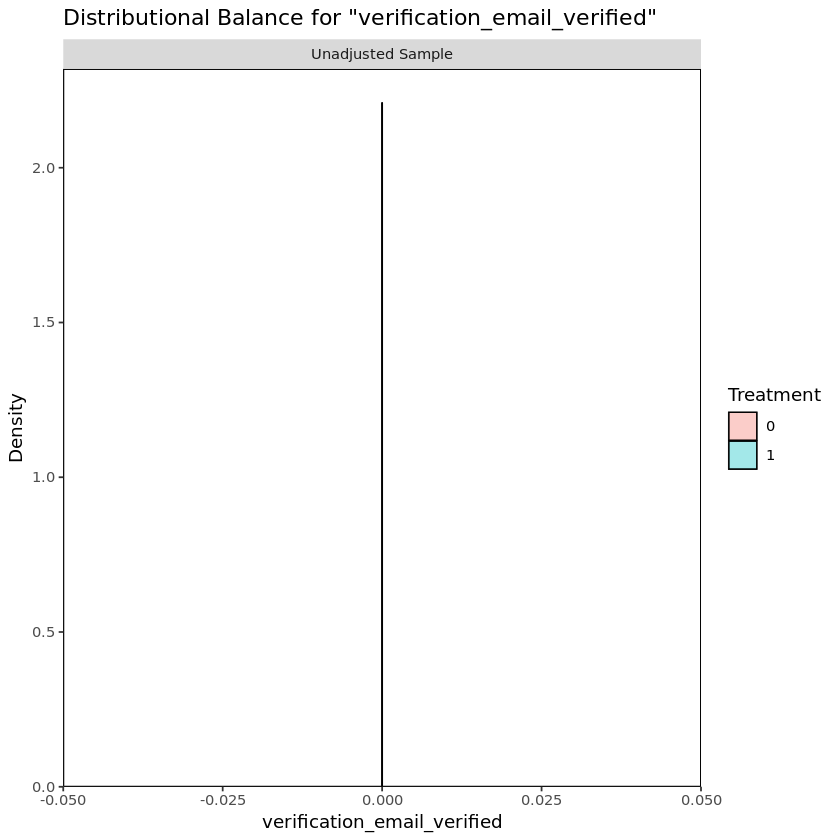

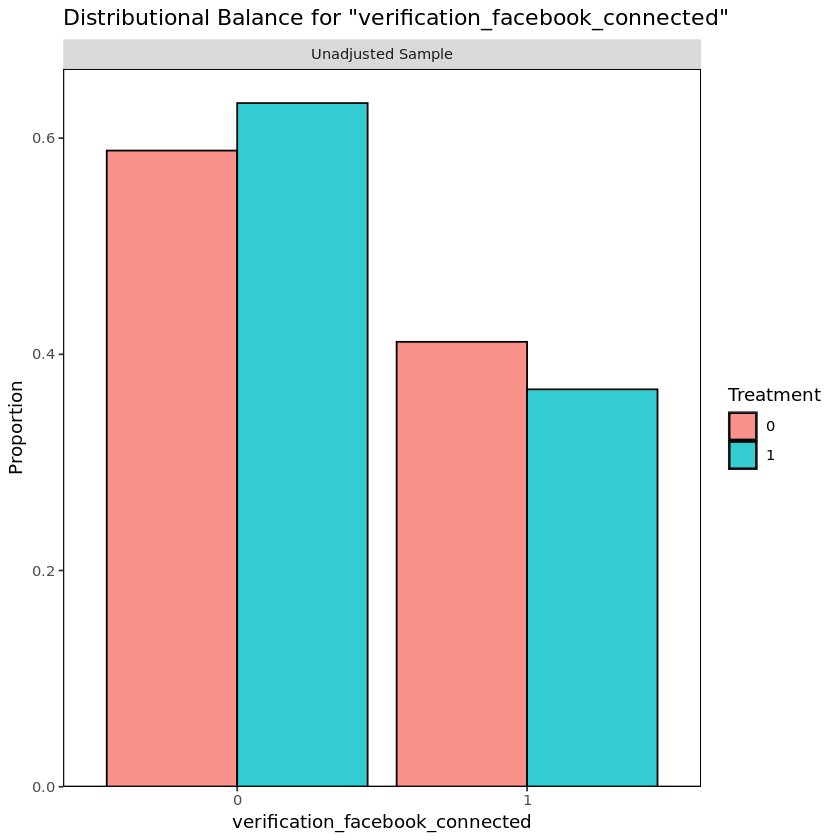

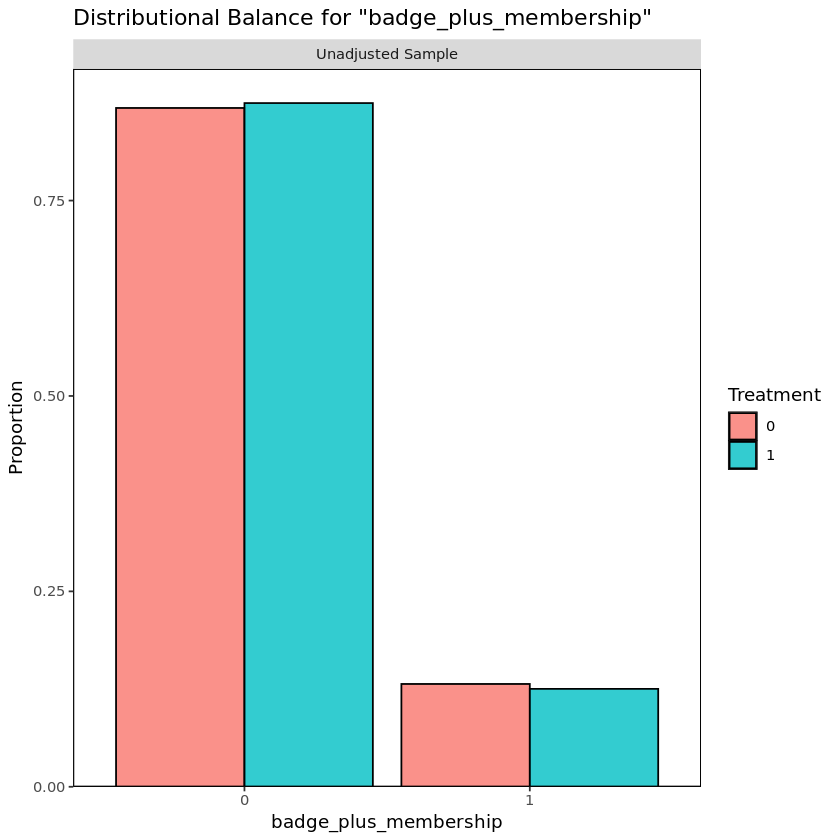

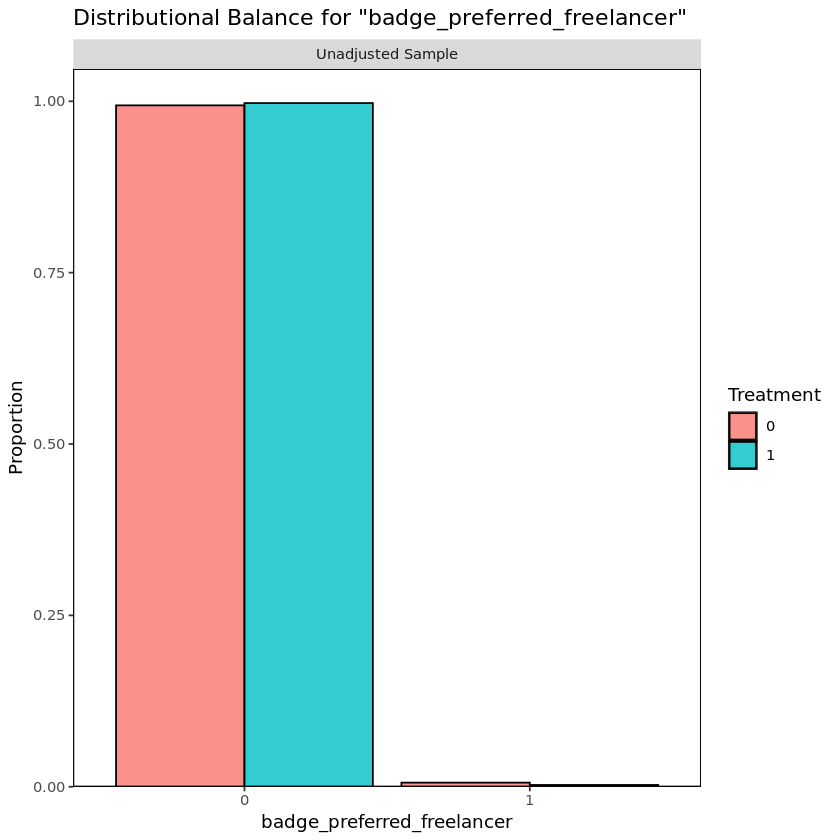

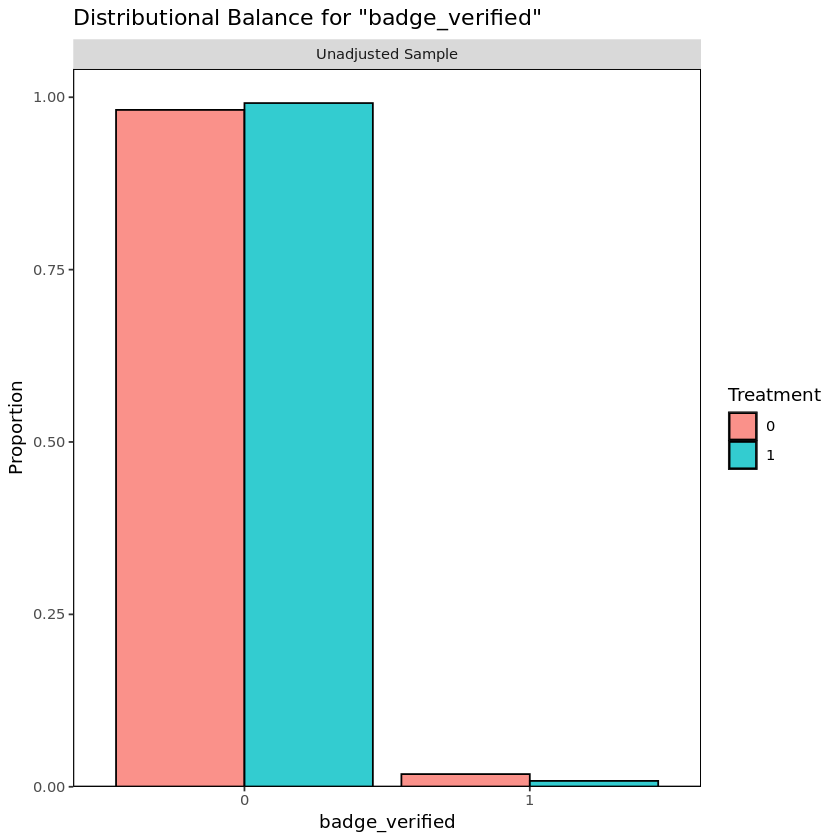

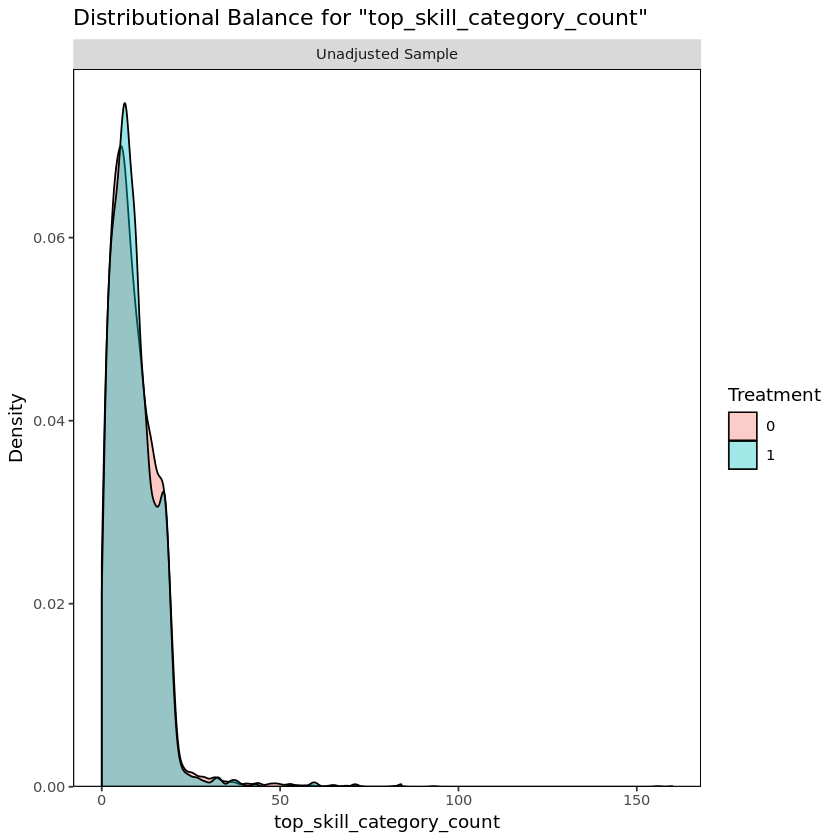

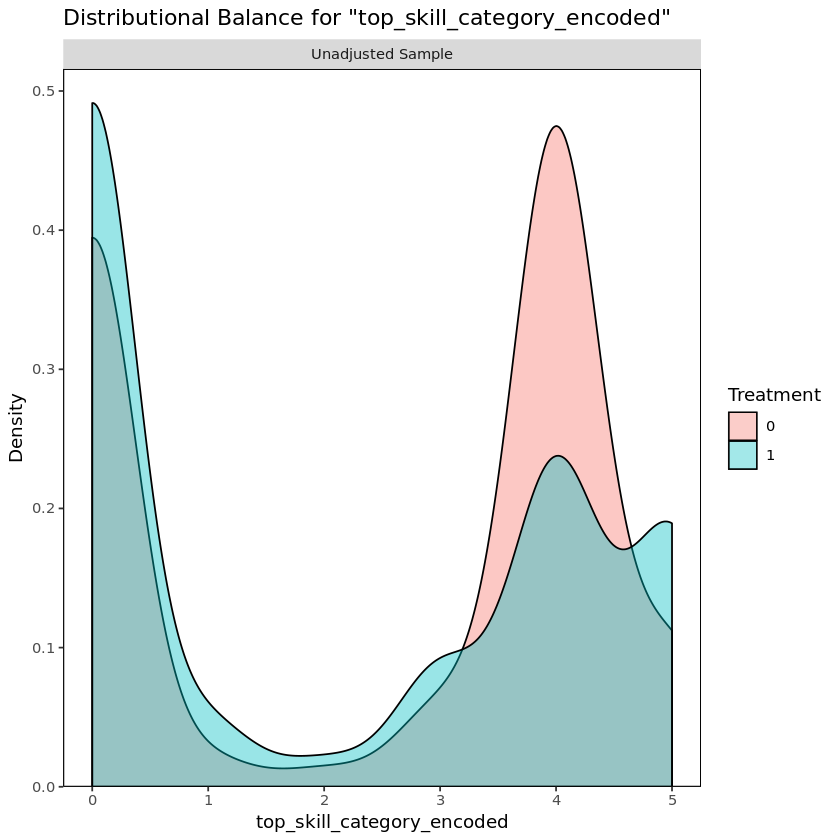

In [ ]:
# covariate balance plots

covariates = c('join_date_from_earliest', 'location_size', 'avg_rating', 'num_reviews', 'num_recommendations', 'pct_jobs_completed', 'pct_on_budget', 'pct_on_time', 'verification_preferred_freelancer', 'verification_identity_verified', 'verification_payment_verified', 'verification_phone_verified', 'verification_email_verified', 'verification_facebook_connected', 'badge_plus_membership', 'badge_preferred_freelancer', 'badge_verified', 'top_skill_category_count', 'top_skill_category_encoded')

for (c in covariates) {
    print(bal.plot(gender ~ join_date_from_earliest + location_size + avg_rating + num_reviews + num_recommendations + pct_jobs_completed + pct_on_budget + pct_on_time + verification_preferred_freelancer + verification_identity_verified + verification_payment_verified + verification_phone_verified + verification_email_verified + verification_facebook_connected + badge_plus_membership + badge_preferred_freelancer + badge_verified + top_skill_category_count + top_skill_category_encoded, data=df, var.name=c))
}  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=acc27b92-84be-4130-8026-204943f38189' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>